<a href="https://colab.research.google.com/github/MumbuaFaithK/ai-and-data-projects/blob/main/Linear_Regression_Assignment_Faith_Mumbua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Load the Dataset


In [ ]:
import zipfile

# Extract to a folder called "datasets"
with zipfile.ZipFile('/content/Regression Datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

import os

# List the folders inside the extracted directory
os.listdir('/content/datasets')
os.listdir('/content/datasets/wk07-regression')
import pandas as pd

# Load a dataset, e.g., homeprices.csv
df = pd.read_csv('/content/datasets/wk07-regression/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# 2.  Data Overview & Visualization

Dataset preview:
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None

Summary statistics:
              area          price
count     5.000000       5.000000
mean   3280.000000  626000.000000
std     540.370243   74949.983322
min    2600.000000  550000.000000
25%    3000.000000  565000.000000
50%    3200.000000  610000.000000
75%    3600.000000  680000.000000
max    4000.000000  725000.000000

Missing values:
area     0
price    0
dtype: int64


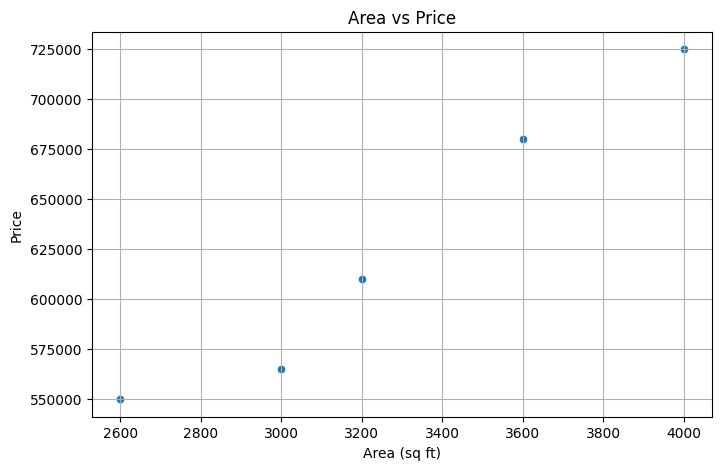

In [ ]:
# Show basic info and preview
print("Dataset preview:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Scatter plot of Area vs Price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 3. Prepare the Data

In [ ]:
# Define feature and target
X = df[['area']]  # Feature (independent variable)
y = df['price']   # Target (dependent variable)

# Split into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Train the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficient (slope):", model.coef_[0])

Model Intercept: 211542.05607476638
Model Coefficient (slope): 128.27102803738316


# 5. Evaluate the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 31355.14
Mean Squared Error (MSE): 983144816.14
Root Mean Squared Error (RMSE): 31355.14
R² Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# 6. Visualize Regression Line

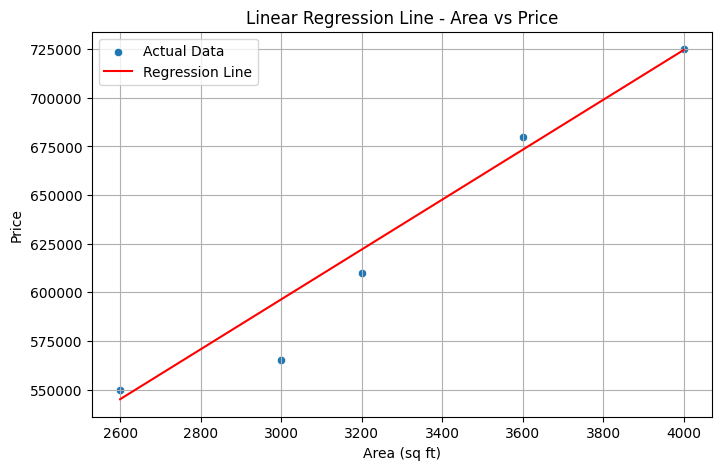

In [ ]:
# Plot regression line on the data
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df, label='Actual Data')
plt.plot(df['area'], model.predict(df[['area']]), color='red', label='Regression Line')
plt.title('Linear Regression Line - Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 7. Make Predictions for New Data

In [ ]:
# Load new data to predict
new_data = pd.read_csv('/content/datasets/wk07-regression/areas.csv')
predicted_prices = model.predict(new_data)

# Combine predictions with input
new_data['Predicted Price'] = predicted_prices
new_data

,area,Predicted Price
0,1000,3.398131e+05
1,1500,4.039486e+05
2,2300,5.065654e+05
3,3540,6.656215e+05
4,4120,7.400187e+05
5,4560,7.964579e+05
6,5490,9.157500e+05
7,3460,6.553598e+05
8,4750,8.208294e+05
9,2300,5.065654e+05
